In [28]:
# Baseball Case Study

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline
#from sklearn.xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv(r'C:\ProgramData\baseball.csv')
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [37]:
df.shape

(30, 17)

In [ ]:
# Important observations 
# 0)There are 30 rows and 17 columns
# 1) As there are only 17 columns ,we do not require PCA 
# 2) Most Features are numeric and continuous

# Representation of different columns :
#R: Runs,
#AB: At Bats
#H: Hits
#2B: Doubles
#3B: Triples
#HR: Homeruns
#BB: Walks
#SO: Strikeouts
#SB: Stolen Bases
#RA: Runs Allowed
#ER: Earned Runs
#ERA: Earned Run Average (ERA)
#CG: Shutouts
#SV: Saves,
#SV: Complete Games
#E: Errors
#W: Win

In [38]:
# Exploratory Data Analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [ ]:
# Above data shows that there 30 rows and 17 columns ,all columns being of integer datatype except ERA column ,
#which is of float type.All the values are non null in the dataset
#  In the data there is no catagroical variables to study but we have all numerical variables

In [39]:
# Statistical summary
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [40]:
# checking for null values in dataset

df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [ ]:
# Above data clearly shows there are no null  values in the dataset

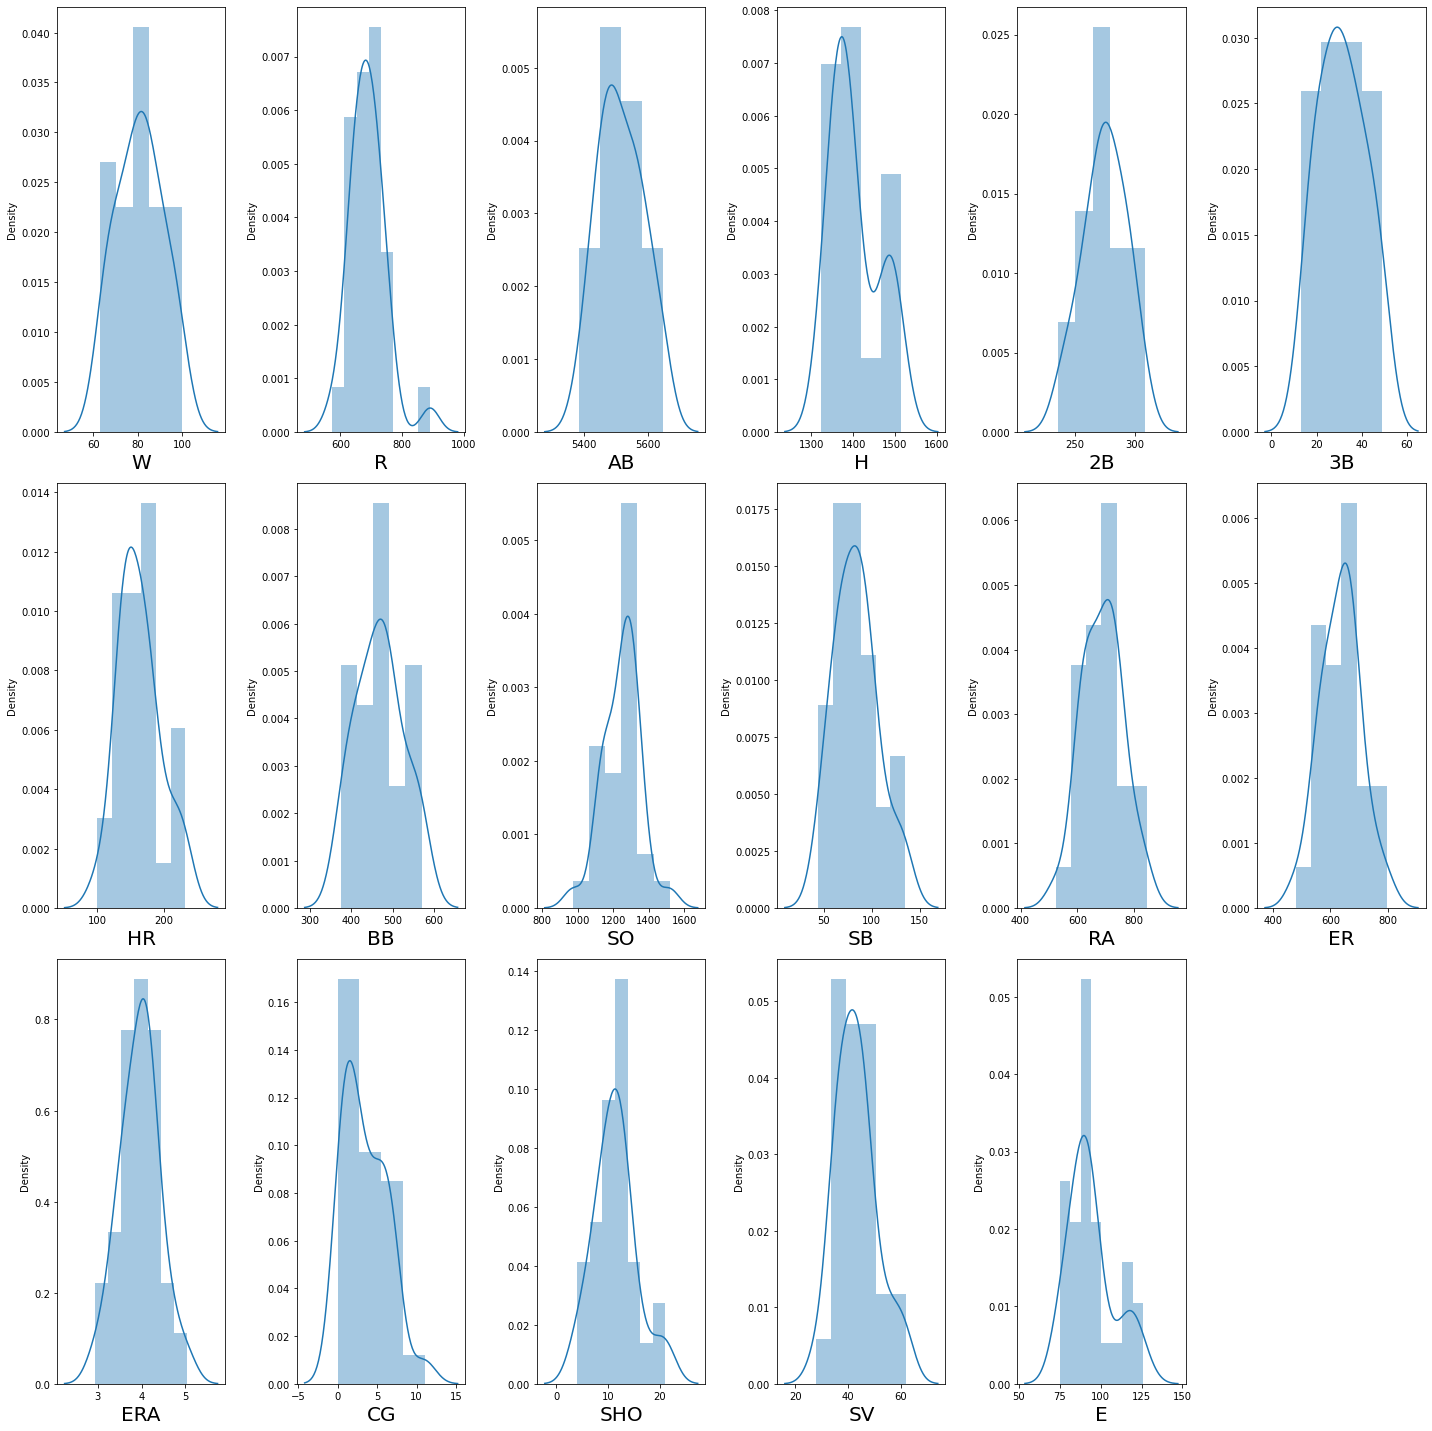

In [63]:
# Checking data distribution for every column

plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if(plotnumber<=17):
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()
    

In [ ]:
# Data Distribution seems to be decent enough except for some skewness visible in 'SO','CG','E' feature

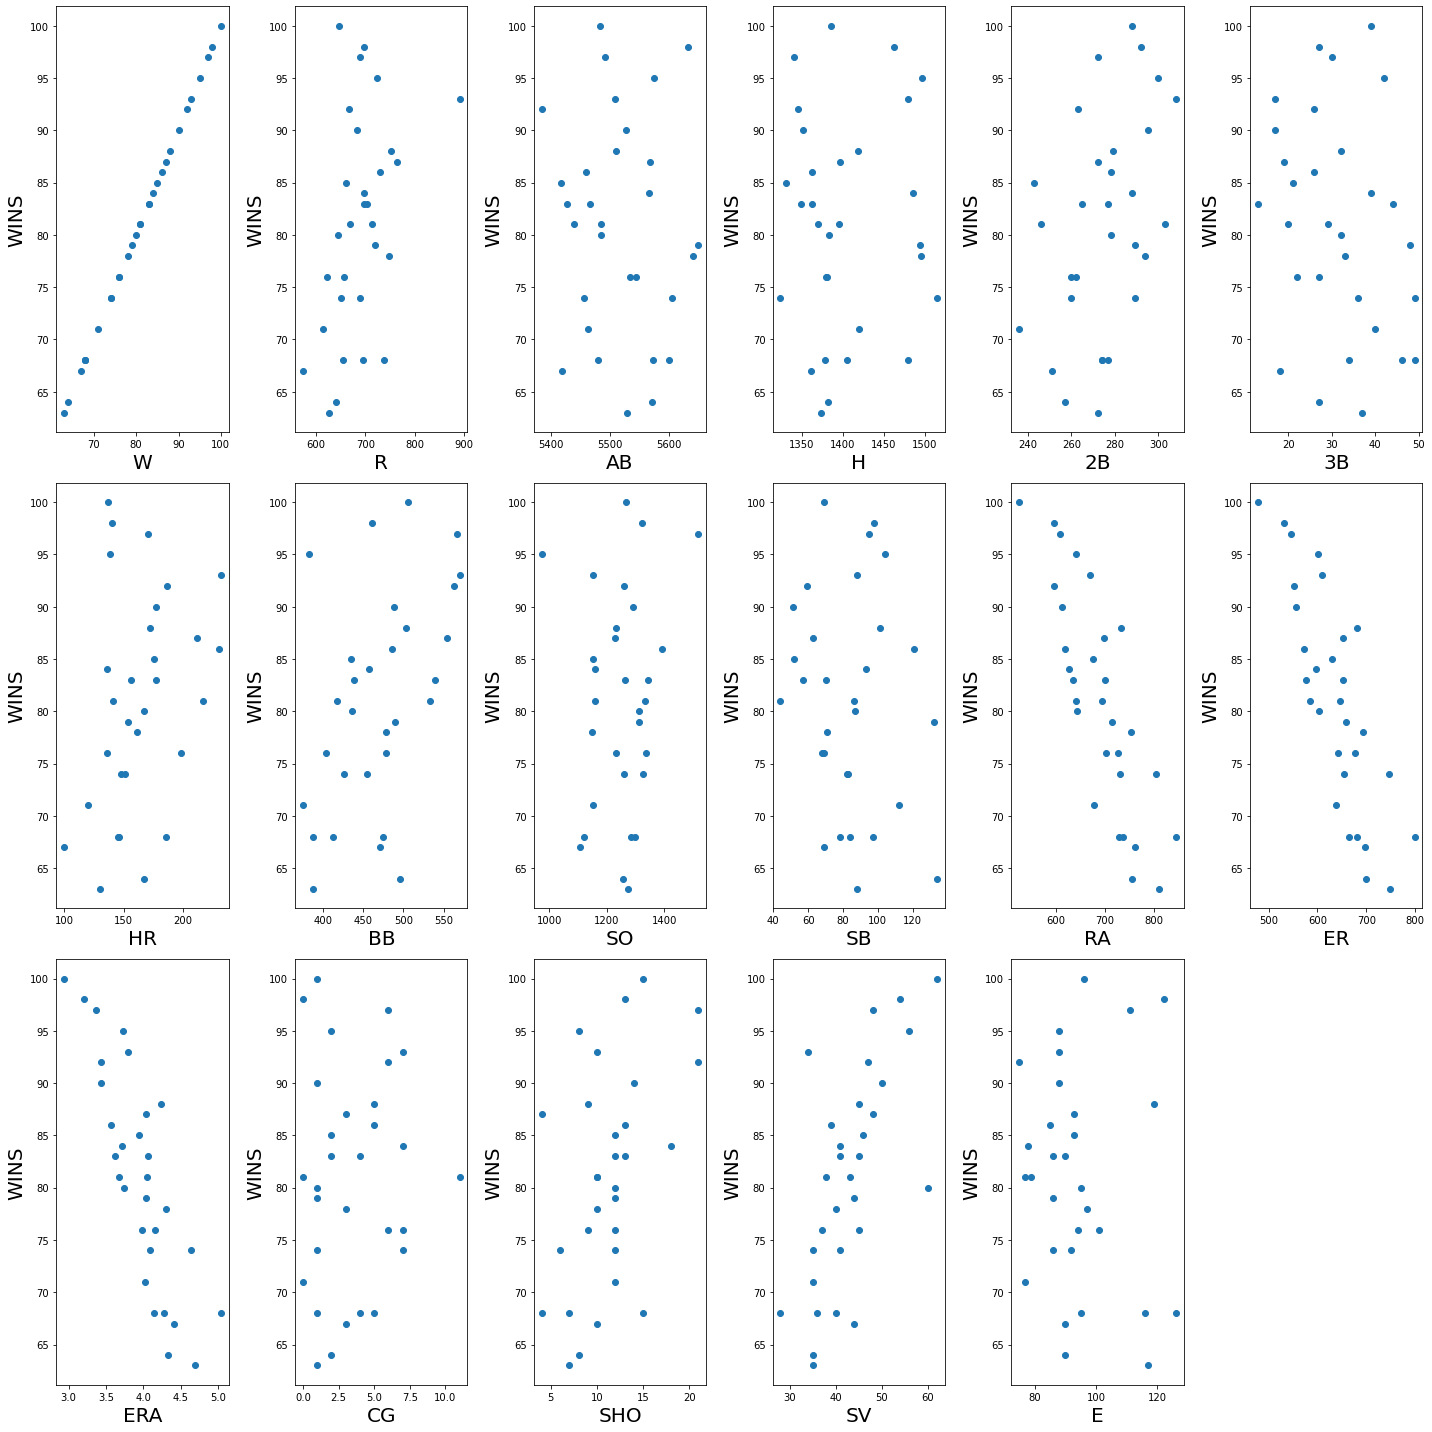

In [66]:
# Visualizing relationship

plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if(plotnumber<=17):
        ax=plt.subplot(3,6,plotnumber)
        plt.scatter(df[column],df['W'])
        plt.xlabel(column,fontsize=20)
        plt.ylabel('WINS',fontsize=20)
        
    plotnumber+=1
plt.tight_layout()
    

In [ ]:
# Clearly negative correlation could be seen in RA,ER,ERA and positive relation could be seen in SV,R,BB

In [2]:
# checking skewness in dataset

df.skew().sort_values()

2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
AB     0.183437
SB     0.479893
HR     0.516441
SHO    0.565790
SV     0.657524
H      0.670254
CG     0.736845
E      0.890132
R      1.200786
dtype: float64

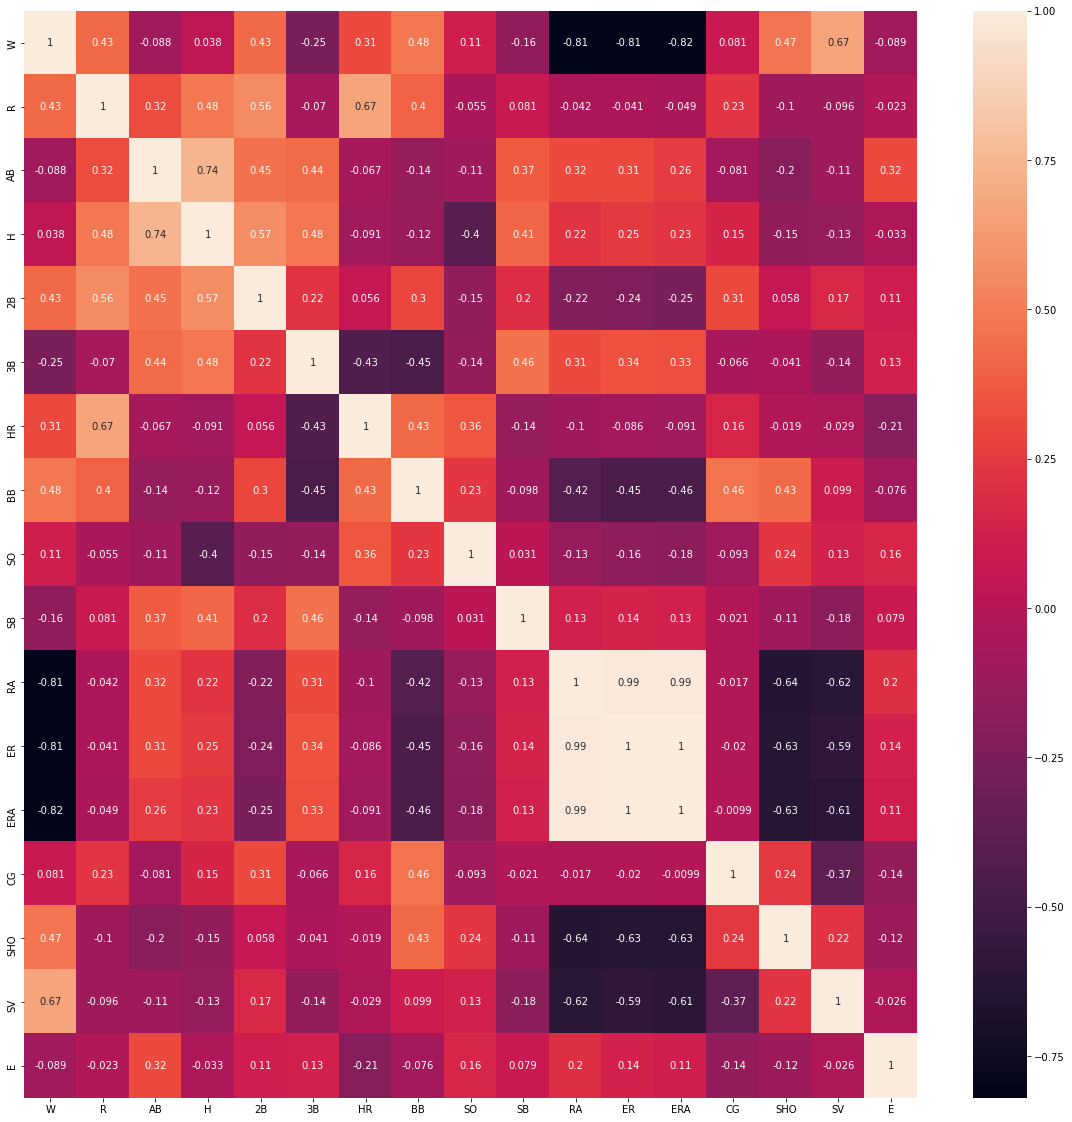

In [68]:
# checking correlation of independent variables with 'W' variable

plt.figure(figsize=(20,20))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [69]:
corr_matrix['W'].sort_values(ascending=False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

In [ ]:
# Clearly from above correlation matrix and data , 'W' has positive correlation with 'SV','SHO','BB','2B' and negatively
# correlated 'ER','RA','ERA'
# And also above matrix shows that 'ERA' ,'RA' have strong positive relation .so we need to confirm more for relationship
# between 'ERA','RA'

In [29]:
# removing skewness from dataset

for col in df:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [138]:
df.skew().sort_values()

SHO   -0.589640
CG    -0.325962
2B    -0.230650
SO    -0.156065
RA     0.045734
W      0.047089
ERA    0.053331
ER     0.058710
3B     0.129502
BB     0.158498
SV     0.163057
AB     0.183437
SB     0.479893
HR     0.516441
H      0.628584
E      0.632916
R      0.744813
dtype: float64

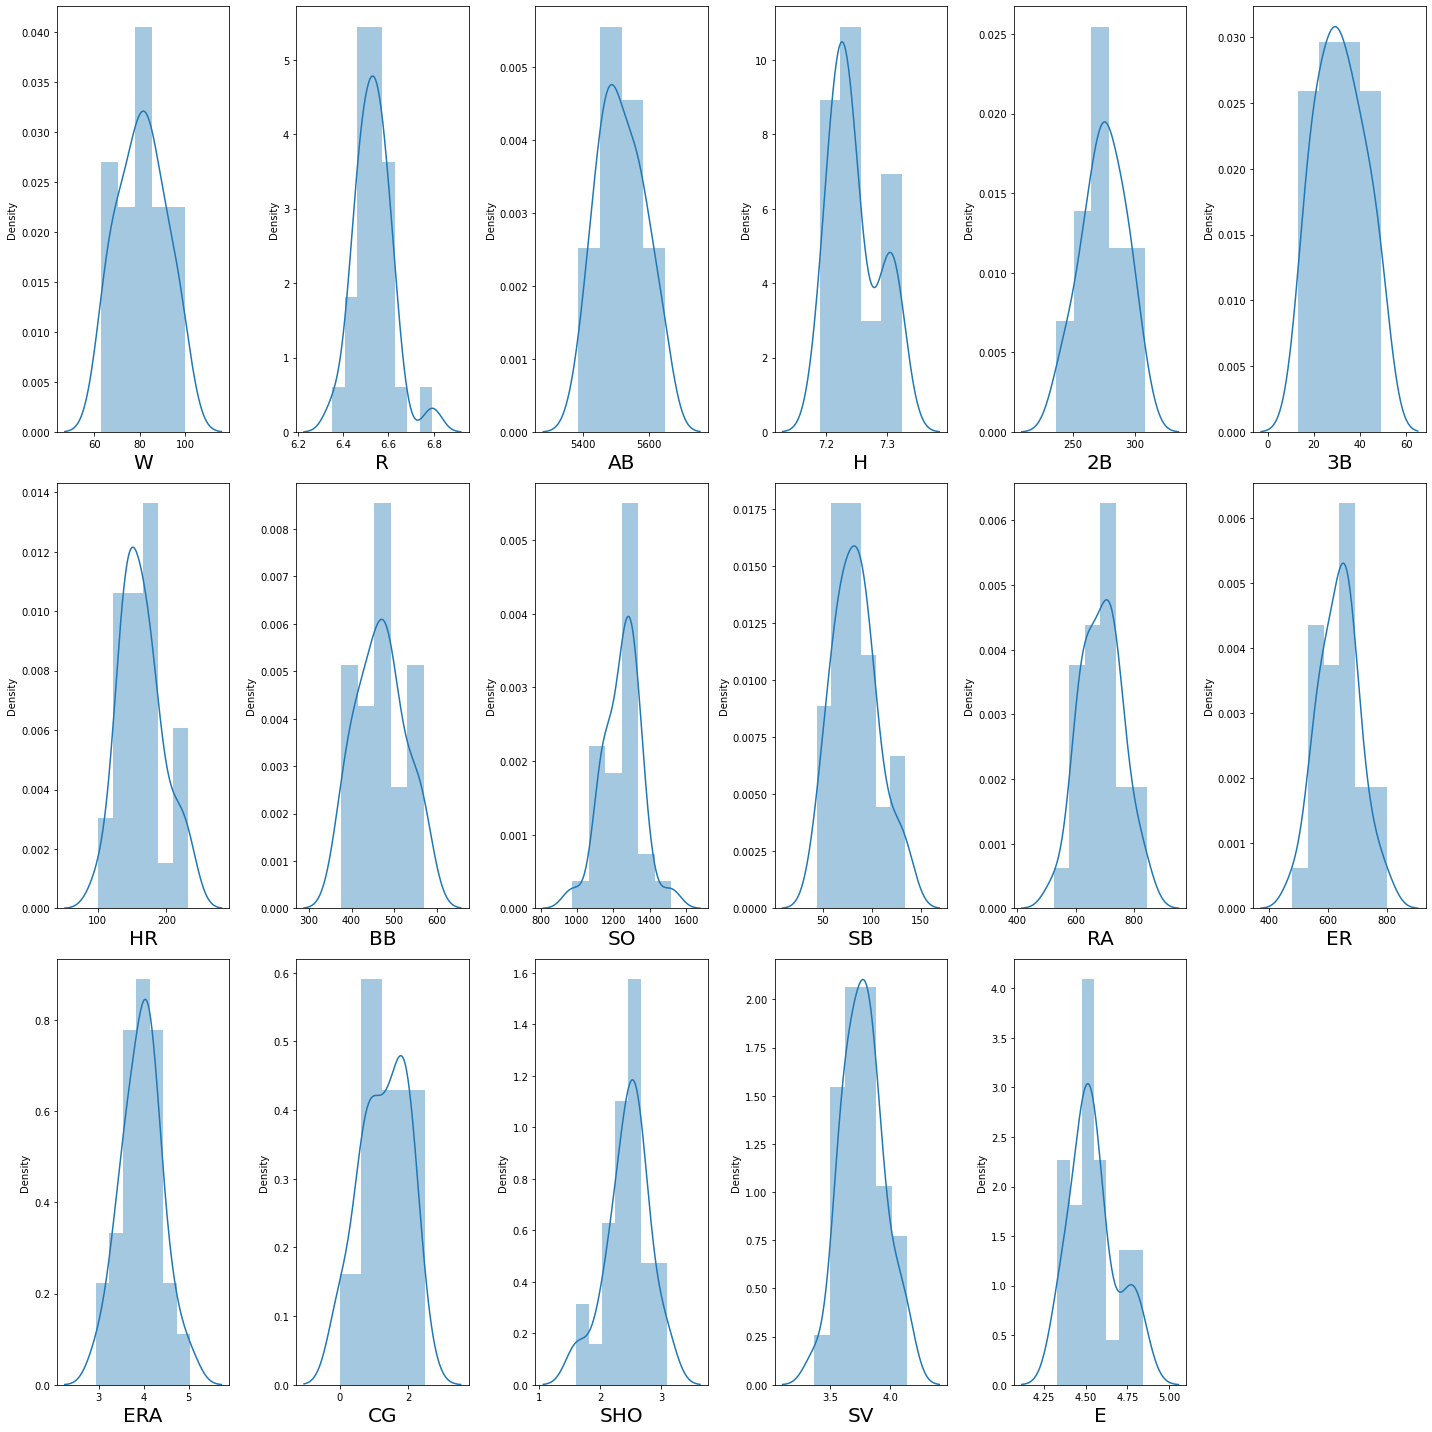

In [24]:
# Checking data distribution for every column after removing skewness

plt.figure(figsize=(20,20))
plotnumber=1

for column in df:
    if(plotnumber<=17):
        ax=plt.subplot(3,6,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

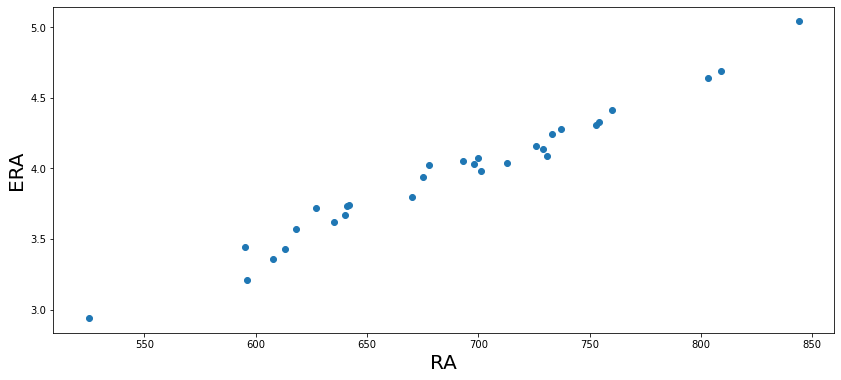

In [71]:
# Checking relationship between 'ERA' and 'RA

plt.figure(figsize=(14,6))
plt.scatter(df['RA'],df['ERA'])
plt.xlabel('RA',fontsize=20)
plt.ylabel('ERA',fontsize=20)
plt.show()

In [23]:
# Clearly above plot shows positive relation between RA and ERA .So we can eliminate RA out of two and also as ERA ,ER 
# are also strongly correlated ,so we can drop ER  also


<function matplotlib.pyplot.show(close=None, block=None)>

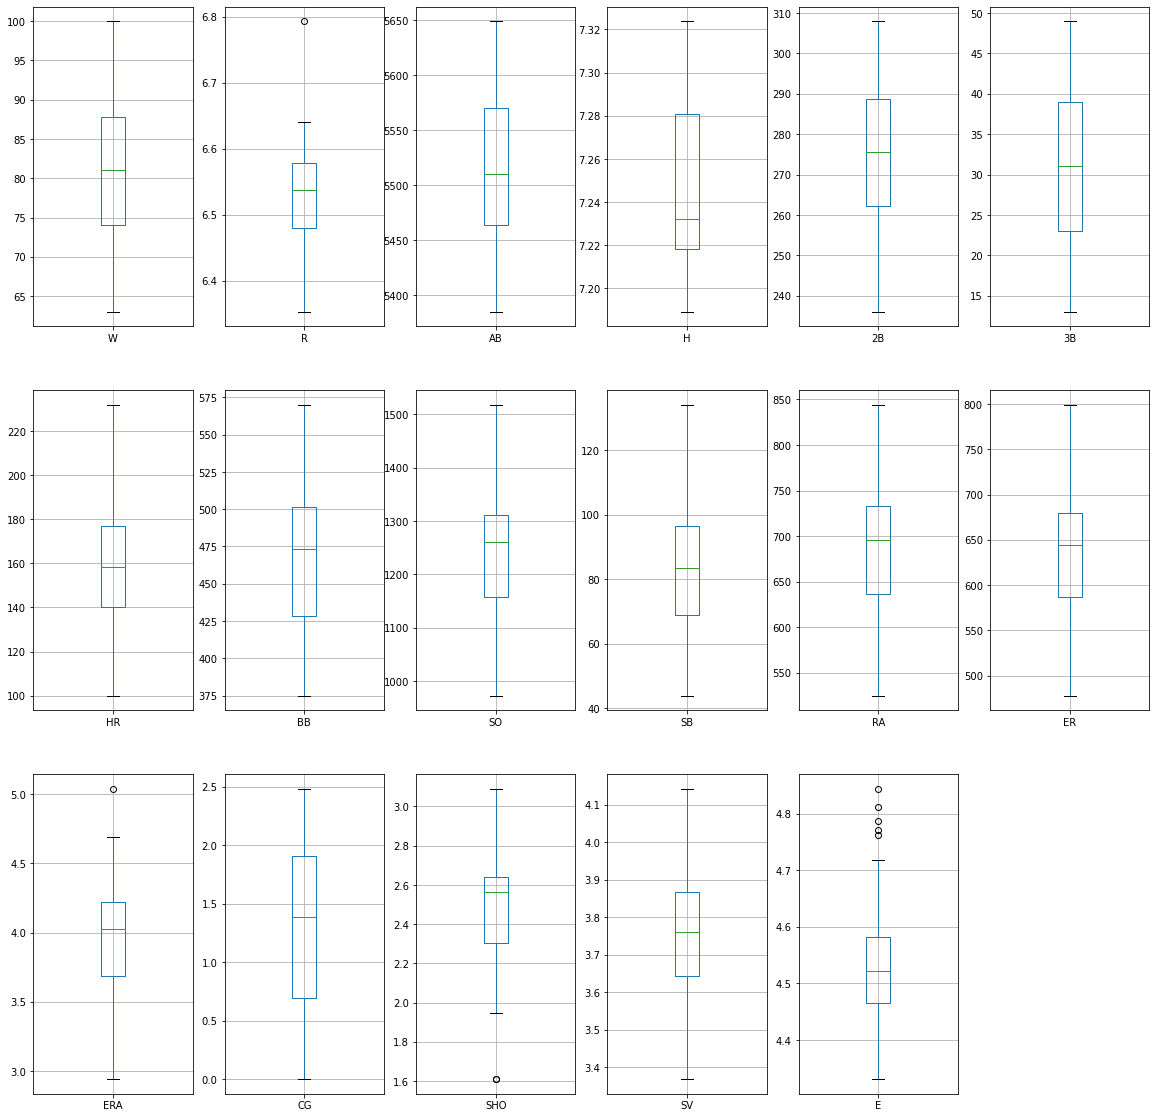

In [23]:
# plotting boxplot to check outliers

df.plot(kind='box', subplots=True, layout=(3,6), figsize=(20,20), grid=True)
plt.show

In [ ]:
# Above plots clearly shows that 'E' feature has maximum outliers along with one in SHO , SV ,ERA,  r,that too very near,
# which can be neglected.We need to check that

In [30]:
# checking and removing outliers


q1=df.quantile(0.25)

q3=df.quantile(0.75)

iqr=q3-q1

E_high=(q3.E+(1.5*iqr.E))

E_high

4.757146206090063

In [31]:
index=np.where(df['E']>E_high)
index

(array([10, 14, 16, 18, 24], dtype=int64),)

In [32]:
df=df.drop(df.index[index])
df.shape


(25, 17)

In [33]:
df.reset_index

<bound method DataFrame.reset_index of       W         R    AB         H   2B  3B   HR   BB    SO   SB   RA   ER  \
0    95  6.586172  5575  7.311886  300  42  139  383   973  104  641  601   
1    83  6.546785  5467  7.207860  277  44  156  439  1264   70  700  653   
2    81  6.507278  5439  7.241366  303  29  141  533  1157   86  640  584   
3    76  6.434547  5533  7.231287  260  27  136  404  1231   68  701  643   
4    74  6.536692  5605  7.323831  289  49  151  455  1259   83  803  746   
5    93  6.793466  5509  7.300473  308  17  232  570  1151   88  670  609   
6    87  6.639876  5567  7.242798  272  19  212  554  1227   63  698  652   
7    81  6.570883  5485  7.223296  246  20  217  418  1331   44  693  646   
8    80  6.469250  5485  7.232733  278  32  167  436  1310   87  642  604   
9    78  6.618739  5640  7.310550  294  33  161  478  1148   71  753  694   
11   86  6.593045  5459  7.218177  278  26  230  486  1392  121  618  572   
12   85  6.495266  5417  7.194437  24

In [34]:
X=df.drop(['W','RA','ER'],axis=1)
y=df['W']


In [35]:

# Scaling the dataset and normalizing feature variables

from sklearn.preprocessing import StandardScaler 

scale = StandardScaler()
X_features=X
X= scale.fit_transform(X)


In [14]:
# Training the model using LinearRegression and evaluating the model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

from sklearn.model_selection import train_test_split

model_lr = LinearRegression()

score_s=0
state=0
for i in range(0,25):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =i)
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    score=r2_score(y_test,y_pred_lr)
    if score>score_s:
        score_s=score
        state=i
        
print('best random_state : ',state)
print('best r2_score : ',score_s)



best random_state :  19
best r2_score :  0.8790472966635009


In [15]:
# Root mean squared error of LinearRegression

rmse=np.sqrt(mean_squared_error(y_test,y_pred_lr))
rmse

9.931245044806115

In [18]:
# comparing original test data wth predicted values

import numpy as np
a=np.array(y_test)
predicted=np.array(model_lr.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,90,94.221292
1,87,91.529393
2,79,84.355153
3,93,100.888555
4,78,89.099139
5,80,86.634542
6,100,116.962844
7,67,52.687445


In [ ]:
# above data shows predicted values are close enough to original test values

In [19]:
# comparing original training data wth predicted values

import numpy as np
a=np.array(y_train)
predicted=np.array(model_lr.predict(X_train))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,81,80.615945
1,86,86.228591
2,97,96.564359
3,76,75.965138
4,85,84.681006
5,68,67.763339
6,74,74.163559
7,92,92.292176
8,71,70.944737
9,64,64.085730


In [ ]:
# above values show that model works good on training data

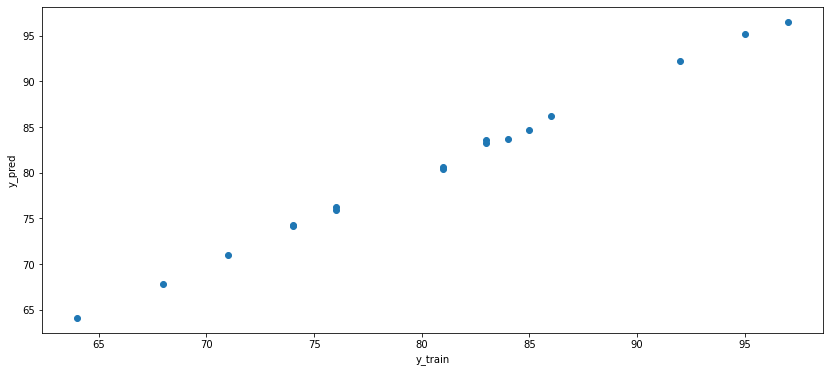

In [21]:
# plotting original training data wth predicted values for linear model

plt.figure(figsize=(14,6))
plt.scatter(x=a,y=predicted)
plt.xlabel('y_train')
plt.ylabel('y_pred')
plt.show()

In [ ]:
# above plot clearly shows that model works good on training data

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state =25)

In [39]:
# # Training the model using Lasso and evaluating the model

from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

model_l = Lasso(alpha=1.0)
model_l.fit(X_train, y_train)
y_pred_l =model_l.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train,y_pred_l))
rmse

3.1701669159188306

In [40]:
# comparing original test data wth predicted values for lasso regression

import numpy as np
a=np.array(y_test)
predicted=np.array(model_l.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,81,84.667656
1,78,79.772811
2,83,87.884814
3,86,88.722347
4,84,85.787423


In [44]:
# # Training the model using Ridge and evaluating the model

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

model_r = Ridge(alpha=1.0)
model_r.fit(X_train, y_train)
y_pred_r =model_r.predict(X_train)
rmse=np.sqrt(mean_squared_error(y_train,y_pred_r))
rmse

1.6215802512522686

In [49]:
# comparing original test data wth predicted values for ridge regression

import numpy as np
a=np.array(y_test)
predicted=np.array(model_r.predict(X_test))
df_com=pd.DataFrame({'original':a,'predcited':predicted},index=range(len(a)))
df_com

,original,predcited
0,74,74.402184
1,80,89.948685
2,79,82.941115
3,76,71.394512
4,92,91.459946


In [ ]:
# Predicted values for Ridge model are very close to original test values.so it can be the best model.let check other model

In [215]:
#Training model with RandomForestRegressor and finding root mean squared error

model_rfl = RandomForestRegressor(random_state=25)
model_rfl.fit(X_train, y_train)
y_pred_rfl = model_rfl.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_rfl))


4.713226071386775

In [214]:
#Training model with adaBoostRegressor and finding root mean squared error for adaBoostRegressor

model_ada = AdaBoostRegressor(n_estimators=100)
model_ada.fit(X_train, y_train)
y_pred_ada = model_ada.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_ada))


8.11959221745635

In [216]:
#Training model with DecisionTreeRegressor and finding root mean squared error for DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
model_dtr.fit(X_train, y_train)
y_pred_dtr = model_dtr.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred_dtr))

12.222929272478018

In [ ]:
# So ,its clear out of all models, Ridge gives lowest RMSE score.Hence fits best for the above problem .

In [222]:
# HyperParameter Tuning using Ridge

from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False], "solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
Ridge_GS = GridSearchCV(model_r, param_grid=params_Ridge, n_jobs=-1)
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_

{'alpha': 0.1, 'fit_intercept': True, 'solver': 'sparse_cg'}

In [223]:
Ridgeregression = Ridge(random_state=3, **Ridge_GS.best_params_)
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=Ridgeregression, X=X_train, y=y_train, cv=5)
all_accuracies

array([-1.19228321,  0.33370847,  0.44334139,  0.11133329,  0.55950427])

In [224]:
print(all_accuracies.mean())

0.05112084231011464


In [225]:
Ridgeregression.fit(X_train,y_train)
Ridgeregression.score(X_test,y_test)

-2.2526835537829193

In [226]:
Ridgeregression.score(X_train,y_train)

0.9842255688813771